# Sentiment Classification Using BERT 

We will use IMDB Movie Reviews Dataset

# What is `BERT`

Bidirectional Encoder Representations from Transformers (BERT) is a technique for NLP (Natural Language Processing) pre-training developed by Google. BERT was created and published in 2018 by Jacob Devlin and his colleagues from Google. Google is leveraging BERT to better understand user searches.

BERT is designed to pretrain deep bidirectional representations from
unlabeled text by jointly conditioning on both
left and right context in all layers. As a result, the pre-trained BERT model can be finetuned with just one additional output layer
to create state-of-the-art models for a wide
range of tasks, such as question answering and
language inference, without substantial taskspecific architecture modifications.

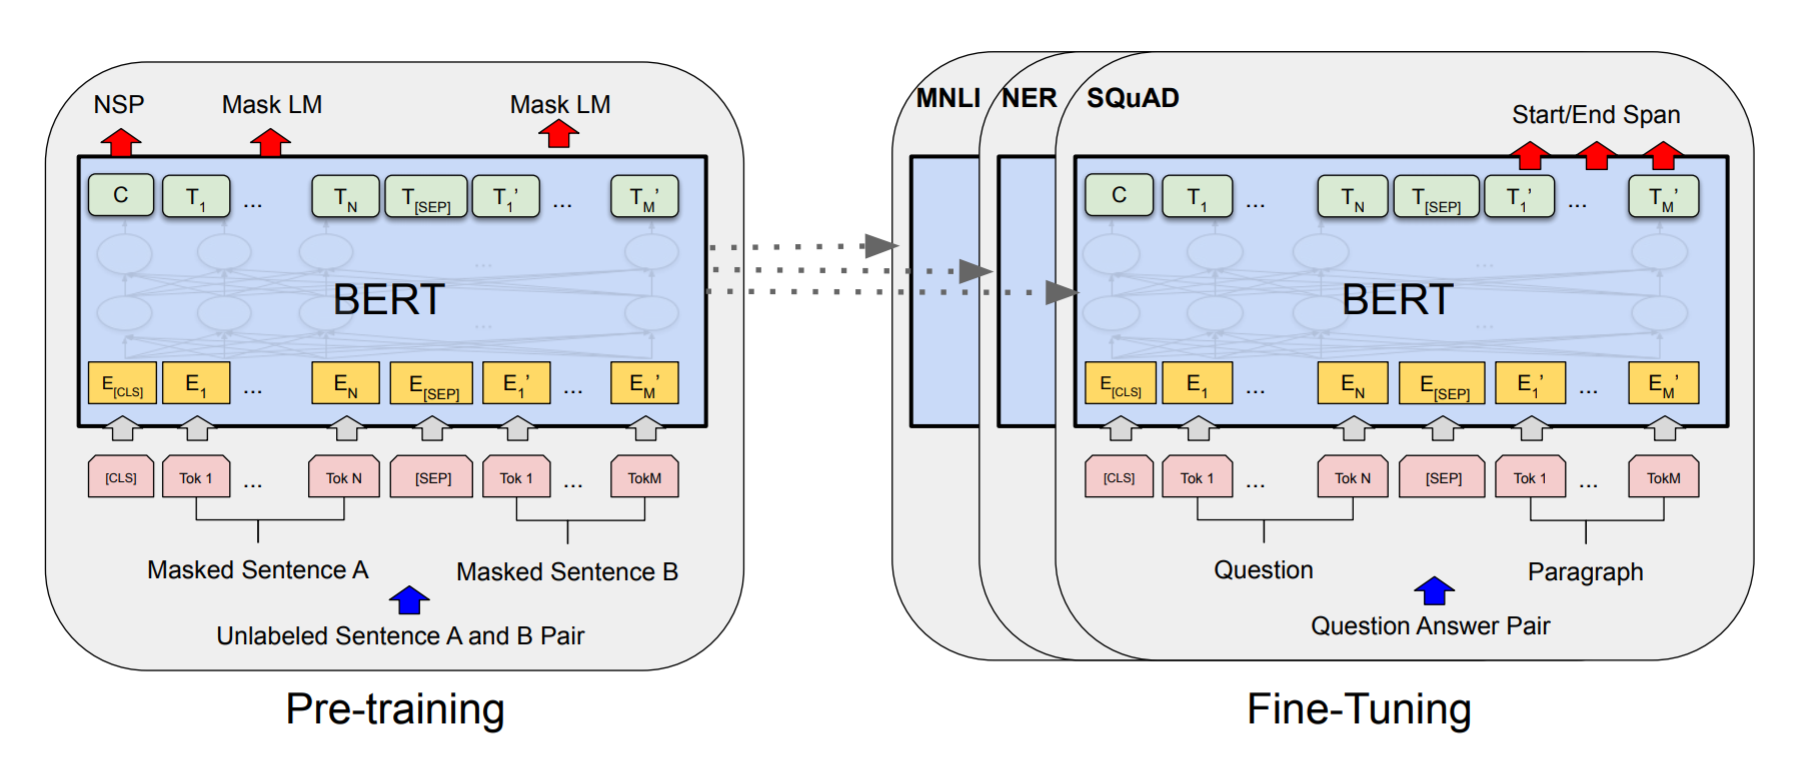

There are two existing strategies for applying pre-trained language representations to downstream tasks: feature-based and fine-tuning.

The
feature-based approach, such as ELMo (Peters
et al., 2018a), uses task-specific architectures that
include the pre-trained representations as additional features. The fine-tuning approach, such as
the Generative Pre-trained Transformer (OpenAI
GPT) (Radford et al., 2018), introduces minimal
task-specific parameters, and is trained on the
downstream tasks by simply fine-tuning all pretrained parameters. 


The two approaches share the
same objective function during pre-training, where
they use unidirectional language models to learn
general language representations.

## Why `BERT`



*   Accurate
*   Can be used for wide variety of task
*   Easy to use
*   It is game changer in NLP







### Additional Reading

Video Lecture: BERT NLP Tutorial 1- Introduction | BERT Machine Learning | KGP Talkie

https://www.youtube.com/watch?v=h_U27jBNYI4

Ref BERT:  **Pre-training of Deep Bidirectional Transformers for
Language Understanding**

https://arxiv.org/abs/1810.04805

Understanding searches better than ever before:

https://www.blog.google/products/search/search-language-understanding-bert/

Good Resource to Read More About the BERT: 

http://jalammar.github.io/illustrated-bert/

Visual Guide to Using BERT:
 
http://jalammar.github.io/a-visual-guide-to-using-bert-for-the-first-time/

---------------------------------------------------

# What is `ktrain`

ktrain is a library to help build, train, debug, and deploy neural networks in the deep learning software framework, Keras.

ktrain uses tf.keras in TensorFlow instead of standalone Keras.) Inspired by the fastai library, with only a few lines of code, ktrain allows you to easily:


*   estimate an optimal learning rate for your model given your data using a learning rate finder
*   employ learning rate schedules such as the triangular learning rate policy, 1cycle policy, and SGDR to more effectively train your model
*   employ fast and easy-to-use pre-canned models for both text classification (e.g., NBSVM, fastText, GRU with pretrained word embeddings) and image classification (e.g., ResNet, Wide Residual Networks, Inception)
*   load and preprocess text and image data from a variety of formats

*   inspect data points that were misclassified to help improve your model
*   leverage a simple prediction API for saving and deploying both models and data-preprocessing steps to make predictions on new raw data






ktrain GitHub: https://github.com/amaiya/ktrain

# Notebook Setup

In [0]:
!pip install ktrain

In [0]:
import tensorflow as tf

In [0]:
tf.__version__

'2.1.0'

In [0]:
!git clone https://github.com/laxmimerit/IMDB-Movie-Reviews-Large-Dataset-50k.git

Cloning into 'IMDB-Movie-Reviews-Large-Dataset-50k'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 10 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (10/10), done.


In [0]:
import pandas as pd
import numpy as np
import ktrain
from ktrain import text
import tensorflow as tf

In [0]:
data_train = pd.read_excel('/content/IMDB-Movie-Reviews-Large-Dataset-50k/train.xlsx', dtype = str)

In [0]:
data_test = pd.read_excel('/content/IMDB-Movie-Reviews-Large-Dataset-50k/test.xlsx', dtype = str)

In [10]:
data_train.tail()

,Reviews,Sentiment
24995,Everyone plays their part pretty well in this ...,pos
24996,It happened with Assault on Prescient 13 in 20...,neg
24997,My God. This movie was awful. I can't complain...,neg
24998,"When I first popped in Happy Birthday to Me, I...",neg
24999,"So why does this show suck? Unfortunately, tha...",neg


In [11]:
data_test.head()

,Reviews,Sentiment
0,Who would have thought that a movie about a ma...,pos
1,After realizing what is going on around us ......,pos
2,I grew up watching the original Disney Cindere...,neg
3,David Mamet wrote the screenplay and made his ...,pos
4,"Admittedly, I didn't have high expectations of...",neg


In [12]:
data_test.shape, data_train.shape

((25000, 2), (25000, 2))

In [13]:
(X_train, y_train), (X_test, y_test), preproc = text.texts_from_df(train_df=data_train,
                                                                   text_column = 'Reviews',
                                                                   label_columns = 'Sentiment',
                                                                   val_df = data_test,
                                                                   maxlen = 500,
                                                                   preprocess_mode = 'bert')

downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [14]:
model = text.text_classifier(name = 'bert',
                             train_data = (X_train, y_train),
                             preproc = preproc)

Is Multi-Label? False
maxlen is 500
done.


In [0]:
learner = ktrain.get_learner(model=model, train_data=(X_train, y_train),
                   val_data = (X_test, y_test),
                   batch_size = 6)

In [0]:
# find out best learning rate?
# learner.lr_find()
# learner.lr_plot()

# it may take days or many days to find out.

In [34]:
learner.fit_onecycle(lr = 2e-5, epochs = 1)



begin training using onecycle policy with max lr of 2e-05...
Train on 25000 samples, validate on 25000 samples
25000/25000 [==============================] - 3500s 140ms/sample - loss: 0.1361 - accuracy: 0.9517 - val_loss: 0.0487 - val_accuracy: 0.9872


In [0]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [0]:
data = ['this movie was horrible, the plot was really boring. acting was okay',
        'the fild is really sucked. there is not plot and acting was bad',
        'what a beautiful movie. great plot. acting was good. will see it again']

In [37]:
predictor.predict(data)

['neg', 'neg', 'pos']

In [38]:
predictor.predict(data, return_proba=True)

array([[0.99797565, 0.00202436],
       [0.99606663, 0.00393336],
       [0.00292433, 0.9970757 ]], dtype=float32)

In [39]:
predictor.get_classes()

['neg', 'pos']

In [0]:
predictor.save('/content/bert')

In [30]:
!zip -r /content/bert.zip /content/bert

  adding: content/bert/ (stored 0%)
  adding: content/bert/tf_model.h5 (deflated 11%)
  adding: content/bert/tf_model.preproc (deflated 52%)


In [0]:
predictor_load = ktrain.load_predictor('/content/bert')

In [32]:
predictor_load.get_classes()

['neg', 'pos']

In [33]:
predictor_load.predict(data)

['neg', 'neg', 'pos']